<a href="https://colab.research.google.com/github/ZhenZhangz/E4511/blob/main/Chembl_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

TensorFlow 1.x selected.
--2021-04-08 05:20:55--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   201MB/s    in 2.5s    

2021-04-08 05:20:57 (201 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.7=py37_0


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


InvalidVersionSpec: Invalid version '4.19.112+': empty version component


real	0m10.007s
user	0m6.643s
sys	0m1.345s
--2021-04-08 05:29:16--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]   1.07

In [ ]:
! pip install MolVS
! pip install bravado
! pip install umap

     |████████████████████████████████| 71kB 7.8MB/s 
  Created wheel for MolVS: filename=MolVS-0.1.1-cp37-none-any.whl size=32376 sha256=ab2e0626ae75876f3aa5d2cf16e811748de7034db571f7775237b9de8c2d6030
  Stored in directory: /root/.cache/pip/wheels/30/37/a8/8ac8147605c9de6b45ffd66d1cc19761d41467db12b34a0de8
Successfully built MolVS
     |████████████████████████████████| 71kB 10.3MB/s 
     |████████████████████████████████| 133kB 13.3MB/s 
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-none-any.whl size=18120 sha256=2e271a059665052f2cf7cc8fcb5afc9d876bc1f9ea1b69fa4f501d34a67fbd16
  Stored in directory: /root/.cache/pip/wheels/bb/af/c9/b6e9fb5f9b2470e4ed2a7241c9ab3a8cdd3bc8555ae02ca2e6
Successfully built strict-rfc3339
  Created wheel for umap: filename=umap-0.1.1-cp37-none-any.whl size=3568 sha256=5e28e9d9b680805e3dc43a5a9521fe4457c0bcb13b63c33a3fcac2d5d4343609
  Stored in directory: /root/.cache/pip/wheels/7b/29/33/b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94cc

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import json
import os
import requests

# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
orig_df = pd.read_csv('/content/drive/MyDrive/Columbia_E4511/SLC6A4_ChEMBL_SMILES.csv')
orig_df

,Unnamed: 0,Molecule_ChEMBL_ID,Molecule_Name,Molecule_Max_Phase,Molecular_Weight,#RO5_Violations,AlogP,Compound_Key,Smiles,Standard_Type,Standard_Relation,Standard_Value,Standard_Units,pChEMBL_Value,Data_Validity_Comment,Comment,Uo_Units,Ligand_Efficiency_BEI,Ligand_Efficiency_LE,Ligand_Efficiency_LLE,Ligand_Efficiency_SEI,Potential_Duplicate,Assay_ChEMBL_ID,Assay_Description,Assay_Type,BAO_Format_ID,BAO_Label,Assay_Organism,Assay_Tissue_ChEMBL_ID,Assay_Tissue_Name,Assay_Cell_Type,Assay_Subcellular_Fraction,Assay_Parameters,Assay_Variant_Accession,Assay_Variant_Mutation,Target_ChEMBL_ID,Target_Name,Target_Organism,Target_Type,Document_ChEMBL_ID,Source_ID,Source_Description,Document_Journal,Document_Year,Cell_ChEMBL_ID,Properties,Standard_Value_nM,base_rdkit_smiles
0,0,CHEMBL3310483,NaN,0.0,340.23,0.0,4.86,2aq,Fc1cc(C(CC2CNC2)Oc2cccc(Cl)c2)ccc1Cl,Inhibition,'=',100.00,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL3364216,Inhibition of serotonin reuptake at human SERT...,B,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,HEK293,NaN,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL3352322,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2014.0,CHEMBL3307715,NaN,100.00,Fc1cc(C(CC2CNC2)Oc2cccc(Cl)c2)ccc1Cl
1,1,CHEMBL4284347,NaN,0.0,388.56,1.0,5.44,28,Cc1cccc(C)c1N1CCN(CCCCOc2ccc3ccccc3c2)CC1,Inhibition,'=',38.30,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL4276208,Inhibition of [3H]serotonin uptake at human SE...,B,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,HEK293,NaN,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL4270660,1,Scientific Literature,Bioorg Med Chem,2018.0,NaN,NaN,38.30,Cc1cccc(C)c1N1CCN(CCCCOc2ccc3ccccc3c2)CC1
2,2,CHEMBL4282796,NaN,0.0,378.49,0.0,4.96,31,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1,IC50,'=',3150.00,nM,5.50,NaN,NaN,UO_0000065,14.54,0.27,0.54,35.02,False,CHEMBL4276203,Inhibition of [3H]serotonin uptake at human SE...,B,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,HEK293,NaN,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL4270660,1,Scientific Literature,Bioorg Med Chem,2018.0,NaN,NaN,3150.00,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1
3,3,CHEMBL4539943,NaN,0.0,505.57,1.0,3.60,NaN,O=C(c1ccc(OCCC2CCOCC2)cc1)[C@@H]1CC[C@H](Cn2nn...,Inhibition,'=',10.18,%,NaN,NaN,Not Active,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL4507817,GPCRScan assay: inhibition of SERT,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,Parental cells: stable HEK | PMID: 3475452/200...,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL4507264,54,Donated Chemical Probes - SGC Frankfurt,NaN,NaN,NaN,Compound concentration None 10.0 uM,10.18,O=C(c1ccc(OCCC2CCOCC2)cc1)[C@@H]1CC[C@H](Cn2nn...
4,4,CHEMBL246873,NaN,0.0,385.94,0.0,4.22,12b,Clc1ccc(C2CNCc3cc(OCCCN4CCCCC4)ncc32)cc1,Ki,'=',141.00,nM,6.85,NaN,NaN,UO_0000065,17.75,0.35,2.63,18.32,False,CHEMBL886655,Binding affinity to human SERT,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL1139156,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007.0,NaN,NaN,141.00,Clc1ccc(C2CNCc3cc(OCCCN4CCCCC4)ncc32)cc1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,10073,CHEMBL4093756,NaN,0.0,473.94,0.0,1.83,10,CCOC(=O)[C@@]12C[C@@H]1[C@@H](n1cnc3c(NC)nc(C#...,Ki,'<',10000.00,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4011359,Inhibition of [3H]mazindol binding to recombin...,B,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,HEK293,NaN,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL4007505,1,Scientific Literature,J Med Chem,2017.0,CHEMBL3307715,NaN,10000.00,CCOC(=O)[C@@]12C[C@@H]1[C@@H](n1cnc3c(NC)nc(C#...
9977,10074,CHEMBL4063684,NaN,0.0,480.66,0.0,4.49,2h,c1ccc(CCCN2CCN(CCCn3

In [ ]:
orig_df.columns = orig_df.columns.str.lower()

In [ ]:
orig_df

,unnamed: 0,molecule_chembl_id,molecule_name,molecule_max_phase,molecular_weight,#ro5_violations,alogp,compound_key,smiles,standard_type,standard_relation,standard_value,standard_units,pchembl_value,data_validity_comment,comment,uo_units,ligand_efficiency_bei,ligand_efficiency_le,ligand_efficiency_lle,ligand_efficiency_sei,potential_duplicate,assay_chembl_id,assay_description,assay_type,bao_format_id,bao_label,assay_organism,assay_tissue_chembl_id,assay_tissue_name,assay_cell_type,assay_subcellular_fraction,assay_parameters,assay_variant_accession,assay_variant_mutation,target_chembl_id,target_name,target_organism,target_type,document_chembl_id,source_id,source_description,document_journal,document_year,cell_chembl_id,properties,standard_value_nm,base_rdkit_smiles
0,0,CHEMBL3310483,NaN,0.0,340.23,0.0,4.86,2aq,Fc1cc(C(CC2CNC2)Oc2cccc(Cl)c2)ccc1Cl,Inhibition,'=',100.00,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL3364216,Inhibition of serotonin reuptake at human SERT...,B,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,HEK293,NaN,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL3352322,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2014.0,CHEMBL3307715,NaN,100.00,Fc1cc(C(CC2CNC2)Oc2cccc(Cl)c2)ccc1Cl
1,1,CHEMBL4284347,NaN,0.0,388.56,1.0,5.44,28,Cc1cccc(C)c1N1CCN(CCCCOc2ccc3ccccc3c2)CC1,Inhibition,'=',38.30,%,NaN,NaN,NaN,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL4276208,Inhibition of [3H]serotonin uptake at human SE...,B,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,HEK293,NaN,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL4270660,1,Scientific Literature,Bioorg Med Chem,2018.0,NaN,NaN,38.30,Cc1cccc(C)c1N1CCN(CCCCOc2ccc3ccccc3c2)CC1
2,2,CHEMBL4282796,NaN,0.0,378.49,0.0,4.96,31,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1,IC50,'=',3150.00,nM,5.50,NaN,NaN,UO_0000065,14.54,0.27,0.54,35.02,False,CHEMBL4276203,Inhibition of [3H]serotonin uptake at human SE...,B,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,HEK293,NaN,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL4270660,1,Scientific Literature,Bioorg Med Chem,2018.0,NaN,NaN,3150.00,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1
3,3,CHEMBL4539943,NaN,0.0,505.57,1.0,3.60,NaN,O=C(c1ccc(OCCC2CCOCC2)cc1)[C@@H]1CC[C@H](Cn2nn...,Inhibition,'=',10.18,%,NaN,NaN,Not Active,UO_0000187,NaN,NaN,NaN,NaN,False,CHEMBL4507817,GPCRScan assay: inhibition of SERT,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,Parental cells: stable HEK | PMID: 3475452/200...,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL4507264,54,Donated Chemical Probes - SGC Frankfurt,NaN,NaN,NaN,Compound concentration None 10.0 uM,10.18,O=C(c1ccc(OCCC2CCOCC2)cc1)[C@@H]1CC[C@H](Cn2nn...
4,4,CHEMBL246873,NaN,0.0,385.94,0.0,4.22,12b,Clc1ccc(C2CNCc3cc(OCCCN4CCCCC4)ncc32)cc1,Ki,'=',141.00,nM,6.85,NaN,NaN,UO_0000065,17.75,0.35,2.63,18.32,False,CHEMBL886655,Binding affinity to human SERT,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL1139156,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007.0,NaN,NaN,141.00,Clc1ccc(C2CNCc3cc(OCCCN4CCCCC4)ncc32)cc1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,10073,CHEMBL4093756,NaN,0.0,473.94,0.0,1.83,10,CCOC(=O)[C@@]12C[C@@H]1[C@@H](n1cnc3c(NC)nc(C#...,Ki,'<',10000.00,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4011359,Inhibition of [3H]mazindol binding to recombin...,B,BAO_0000219,cell-based format,Homo sapiens,NaN,NaN,HEK293,NaN,NaN,NaN,NaN,CHEMBL228,Serotonin transporter,Homo sapiens,SINGLE PROTEIN,CHEMBL4007505,1,Scientific Literature,J Med Chem,2017.0,CHEMBL3307715,NaN,10000.00,CCOC(=O)[C@@]12C[C@@H]1[C@@H](n1cnc3c(NC)nc(C#...
9977,10074,CHEMBL4063684,NaN,0.0,480.66,0.0,4.49,2h,c1ccc(CCCN2CCN(CCCn3

In [ ]:
orig_df.columns

Index(['unnamed: 0', 'molecule_chembl_id', 'molecule_name',
       'molecule_max_phase', 'molecular_weight', '#ro5_violations', 'alogp',
       'compound_key', 'smiles', 'standard_type', 'standard_relation',
       'standard_value', 'standard_units', 'pchembl_value',
       'data_validity_comment', 'comment', 'uo_units', 'ligand_efficiency_bei',
       'ligand_efficiency_le', 'ligand_efficiency_lle',
       'ligand_efficiency_sei', 'potential_duplicate', 'assay_chembl_id',
       'assay_description', 'assay_type', 'bao_format_id', 'bao_label',
       'assay_organism', 'assay_tissue_chembl_id', 'assay_tissue_name',
       'assay_cell_type', 'assay_subcellular_fraction', 'assay_parameters',
       'assay_variant_accession', 'assay_variant_mutation', 'target_chembl_id',
       'target_name', 'target_organism', 'target_type', 'document_chembl_id',
       'source_id', 'source_description', 'document_journal', 'document_year',
       'cell_chembl_id', 'properties', 'standard_value_nm',
     

In [ ]:
df = orig_df[['molecule_chembl_id','smiles', 'standard_type', 'standard_relation', 'standard_value',
              'standard_units', 'pchembl_value','base_rdkit_smiles','molecular_weight']]
df

,molecule_chembl_id,smiles,standard_type,standard_relation,standard_value,standard_units,pchembl_value,base_rdkit_smiles,molecular_weight
0,CHEMBL3310483,Fc1cc(C(CC2CNC2)Oc2cccc(Cl)c2)ccc1Cl,Inhibition,'=',100.00,%,NaN,Fc1cc(C(CC2CNC2)Oc2cccc(Cl)c2)ccc1Cl,340.23
1,CHEMBL4284347,Cc1cccc(C)c1N1CCN(CCCCOc2ccc3ccccc3c2)CC1,Inhibition,'=',38.30,%,NaN,Cc1cccc(C)c1N1CCN(CCCCOc2ccc3ccccc3c2)CC1,388.56
2,CHEMBL4282796,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1,IC50,'=',3150.00,nM,5.50,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1,378.49
3,CHEMBL4539943,O=C(c1ccc(OCCC2CCOCC2)cc1)[C@@H]1CC[C@H](Cn2nn...,Inhibition,'=',10.18,%,NaN,O=C(c1ccc(OCCC2CCOCC2)cc1)[C@@H]1CC[C@H](Cn2nn...,505.57
4,CHEMBL246873,Clc1ccc(C2CNCc3cc(OCCCN4CCCCC4)ncc32)cc1,Ki,'=',141.00,nM,6.85,Clc1ccc(C2CNCc3cc(OCCCN4CCCCC4)ncc32)cc1,385.94
...,...,...,...,...,...,...,...,...,...
9976,CHEMBL4093756,CCOC(=O)[C@@]12C[C@@H]1[C@@H](n1cnc3c(NC)nc(C#...,Ki,'<',10000.00,nM,NaN,CCOC(=O)[C@@]12C[C@@H]1[C@@H](n1cnc3c(NC)nc(C#...,473.94
9977,CHEMBL4063684,c1ccc(CCCN2CCN(CCCn3nnnc3C(c3ccccc3)c3ccccc3)C...,IC50,'=',8000.00,nM,5.10,c1ccc(CCCN2CCN(CCCn3nnnc3C(c3ccccc3)c3ccccc3)C...,480.66
9978,CHEMBL4530740,C[C@H](NC(=O)c1cnc2n1[C@](C)(Cc1ccc(C#N)cc1)C(...,% Ctrl,'=',119.00,%,NaN,C[C@H](NC(=O)c1cnc2n1[C@](C)(Cc1ccc(C#N)cc1)C(...,646.51
9979,CHEMBL2204283,N#CC1(c2ccccn2)CCN(Cc2cc(C(=O)N3CCCC3)c(=O)n3c...,Inhibition,'=',-12.04,%,NaN,N#CC1(c2ccccn2)CCN(Cc2cc(C(=O)N3CCCC3)c(=O)n3c...,441.54


In [ ]:
df.standard_type.value_counts()

IC50                                                   4304
Ki                                                     3965
Inhibition                                              984
Activity                                                166
EC50                                                    161
Ratio                                                   112
FC                                                       62
pKD                                                      56
T1/2                                                     30
Kd                                                       23
RFU                                                      20
ED50                                                     20
Ratio IC50                                               16
INH                                                      11
IC5                                                      10
% Ctrl                                                    8
% Inhibition of Control Specific Binding

(array([1.409e+03, 7.527e+03, 8.970e+02, 9.000e+01, 2.900e+01, 1.100e+01,
        6.000e+00, 1.000e+01, 0.000e+00, 2.000e+00]),
 array([  32.05 ,  258.542,  485.034,  711.526,  938.018, 1164.51 ,
        1391.002, 1617.494, 1843.986, 2070.478, 2296.97 ]),
 <a list of 10 Patch objects>)

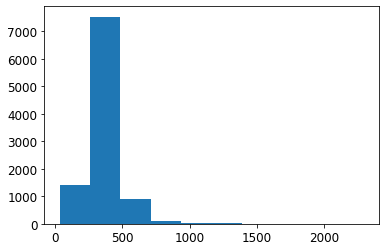

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df.molecular_weight)

In [ ]:
df.loc[(df.molecular_weight>2000)].index

Int64Index([6221, 7019], dtype='int64')

In [ ]:
df.drop(index=df.loc[(df.molecular_weight>2000)].index)  # drop molecule weight >2000

,molecule_chembl_id,smiles,standard_type,standard_relation,standard_value,standard_units,pchembl_value,base_rdkit_smiles,molecular_weight
0,CHEMBL3310483,Fc1cc(C(CC2CNC2)Oc2cccc(Cl)c2)ccc1Cl,Inhibition,'=',100.00,%,NaN,Fc1cc(C(CC2CNC2)Oc2cccc(Cl)c2)ccc1Cl,340.23
1,CHEMBL4284347,Cc1cccc(C)c1N1CCN(CCCCOc2ccc3ccccc3c2)CC1,Inhibition,'=',38.30,%,NaN,Cc1cccc(C)c1N1CCN(CCCCOc2ccc3ccccc3c2)CC1,388.56
2,CHEMBL4282796,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1,IC50,'=',3150.00,nM,5.50,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1,378.49
3,CHEMBL4539943,O=C(c1ccc(OCCC2CCOCC2)cc1)[C@@H]1CC[C@H](Cn2nn...,Inhibition,'=',10.18,%,NaN,O=C(c1ccc(OCCC2CCOCC2)cc1)[C@@H]1CC[C@H](Cn2nn...,505.57
4,CHEMBL246873,Clc1ccc(C2CNCc3cc(OCCCN4CCCCC4)ncc32)cc1,Ki,'=',141.00,nM,6.85,Clc1ccc(C2CNCc3cc(OCCCN4CCCCC4)ncc32)cc1,385.94
...,...,...,...,...,...,...,...,...,...
9976,CHEMBL4093756,CCOC(=O)[C@@]12C[C@@H]1[C@@H](n1cnc3c(NC)nc(C#...,Ki,'<',10000.00,nM,NaN,CCOC(=O)[C@@]12C[C@@H]1[C@@H](n1cnc3c(NC)nc(C#...,473.94
9977,CHEMBL4063684,c1ccc(CCCN2CCN(CCCn3nnnc3C(c3ccccc3)c3ccccc3)C...,IC50,'=',8000.00,nM,5.10,c1ccc(CCCN2CCN(CCCn3nnnc3C(c3ccccc3)c3ccccc3)C...,480.66
9978,CHEMBL4530740,C[C@H](NC(=O)c1cnc2n1[C@](C)(Cc1ccc(C#N)cc1)C(...,% Ctrl,'=',119.00,%,NaN,C[C@H](NC(=O)c1cnc2n1[C@](C)(Cc1ccc(C#N)cc1)C(...,646.51
9979,CHEMBL2204283,N#CC1(c2ccccn2)CCN(Cc2cc(C(=O)N3CCCC3)c(=O)n3c...,Inhibition,'=',-12.04,%,NaN,N#CC1(c2ccccn2)CCN(Cc2cc(C(=O)N3CCCC3)c(=O)n3c...,441.54


In [ ]:
print(sum(df['pchembl_value'].isna()) )
print(len(df) - sum(df['pchembl_value'].isna()))

len(orig_df)


4127
5854


9981

In [ ]:
# filter out to have df of standard type IC/EC50, non empty standard value, non empoty inchi key,
# non-empty compound id, standard units = 'NM'

In [ ]:
df.columns

Index(['molecule_chembl_id', 'smiles', 'standard_type', 'standard_relation',
       'standard_value', 'standard_units', 'pchembl_value',
       'base_rdkit_smiles', 'molecular_weight'],
      dtype='object')

In [ ]:
dset_df = df[~(df.molecule_chembl_id.isna())  &
            (df.standard_units == 'nM') &
            ~df.standard_value.isna() &
             (df.standard_relation == "'='" ) &
             ~df.standard_relation.isna()&
             ~df.pchembl_value.isna()]

In [ ]:
dset_df = dset_df.loc[(df.standard_type == 'IC50') | (df.standard_type == 'EC50')]
dset_df

,molecule_chembl_id,smiles,standard_type,standard_relation,standard_value,standard_units,pchembl_value,base_rdkit_smiles,molecular_weight
2,CHEMBL4282796,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1,IC50,'=',3150.0,nM,5.50,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1,378.49
5,CHEMBL524313,CNC[C@@H]1OCc2ccccc2[C@@H]1Oc1ccc(O)cc1C,IC50,'=',35.0,nM,7.46,CNC[C@@H]1OCc2ccccc2[C@@H]1Oc1ccc(O)cc1C,299.37
6,CHEMBL498141,CNC[C@H]1OCc2ccccc2[C@H]1Oc1ccccc1C(F)(F)F,IC50,'=',6700.0,nM,5.17,CNC[C@H]1OCc2ccccc2[C@H]1Oc1ccccc1C(F)(F)F,337.34
12,CHEMBL2219885,c1ccc(COC(c2ccccc2)C2CNC2)cc1,IC50,'=',82.9,nM,7.08,c1ccc(COC(c2ccccc2)C2CNC2)cc1,253.35
15,CHEMBL2333624,CN1CCC(COCc2cc(C(F)(F)F)cc(N3CCCC3)n2)(c2ccccc...,IC50,'=',6.6,nM,8.18,CN1CCC(COCc2cc(C(F)(F)F)cc(N3CCCC3)n2)(c2ccccc...,433.52
...,...,...,...,...,...,...,...,...,...
9957,CHEMBL3673139,Oc1ccc2c(c1)CN1CCC2(c2ccc(Cl)cc2)CC1,IC50,'=',16.3,nM,7.79,Oc1ccc2c(c1)CN1CCC2(c2ccc(Cl)cc2)CC1,299.80
9958,CHEMBL4070493,CN(C)CCCC1(c2ccc3ccccc3c2)OCc2cc(C#N)ccc21,IC50,'=',34.0,nM,7.47,CN(C)CCCC1(c2ccc3ccccc3c2)OCc2cc(C#N)ccc21,356.47
9962,CHEMBL2219900,CCOC(c1ccc(Cl)c(Cl)c1)C1CNC1,IC50,'=',97.5,nM,7.01,CCOC(c1ccc(Cl)c(Cl)c1)C1CNC1,260.16
9968,CHEMBL4085773,CN(C)CCCC1(c2ccc(F)cc2)OCc2ccc3ccccc3c21,EC50,'=',38000.0,nM,4.42,CN(C)CCCC1(c2ccc(F)cc2)OCc2ccc3ccccc3c21,349.45


In [ ]:
sum(df.base_rdkit_smiles.isna())

0

In [ ]:
for col in dset_df.columns:
    print(dset_df[col].value_counts())

CHEMBL41         35
CHEMBL370805     25
CHEMBL11         14
CHEMBL1175       14
CHEMBL87031      10
                 ..
CHEMBL576036      1
CHEMBL487221      1
CHEMBL1683874     1
CHEMBL3334796     1
CHEMBL483573      1
Name: molecule_chembl_id, Length: 2599, dtype: int64
CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1                        35
COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[C@H]1N2C    25
CNCC[C@H](Oc1cccc2ccccc12)c1cccs1                         14
CN(C)CCCN1c2ccccc2CCc2ccccc21                             14
CNCC[C@@H](Oc1ccccc1C)c1ccccc1                            10
                                                          ..
CN(C)Cc1ccccc1Oc1ccc(F)c(F)c1                              1
CNC[C@@H]1OCc2ccccc2[C@@H]1Oc1cc(F)ccc1C                   1
CNCc1ccccc1Cc1ccc(SC)cc1                                   1
COc1cccc2c1O[C@@H](CN1C3C=C(c4ccc5ccccc5c4)CC1CC3)CO2      1
Cc1c(Cl)cccc1N1CCN(CCCNC(=O)c2nc(C)n(CC(C)C)c2C)CC1        1
Name: smiles, Length: 2599, dtype: int64
IC50    3002
EC

In [ ]:
dset_df.dtypes

molecule_chembl_id     object
smiles                 object
standard_type          object
standard_relation      object
standard_value        float64
standard_units         object
pchembl_value         float64
base_rdkit_smiles      object
molecular_weight      float64
dtype: object

Mounted at /content/drive


In [ ]:
dset_df.to_csv('drive/MyDrive/CHEMBL_DROP.csv')

In [ ]:

dp.diversity_plots(dset_key = 'drive/MyDrive/CHEMBL_DROP.csv',
                   datastore = False,
                   response_col = 'pchembl_value', smiles_col='base_rdkit_smiles',id_col='molecule_chembl_id',
                   max_for_mcs = 100)

Canonicalizing 2554 molecules...
Done
Computing fingerprints...
Done
Computing Tanimoto distance matrix...
Done


AttributeError: ignored

In [ ]:
feat_type = 'ECFP'
dist_metric = 'tanimoto'
smiles_lst1 = dset_df['base_rdkit_smiles'].tolist()
calc_type = 'nearest'
dist_sample = cd.calc_dist_smiles(feat_type, dist_metric, smiles_lst1, None, calc_type)

print(len(dist_sample))
print(len(smiles_lst1))

3094
3094


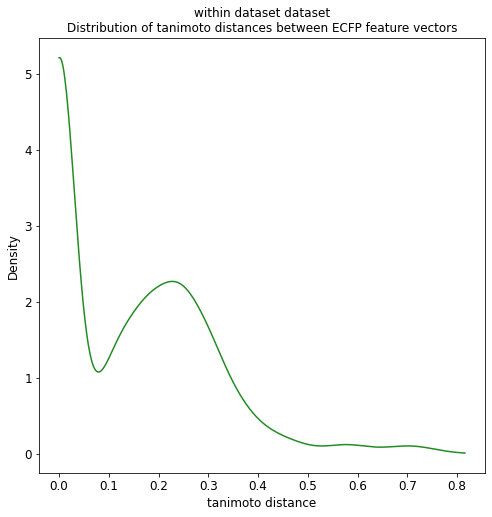

In [ ]:
from scipy.stats.kde import gaussian_kde

# import math library
import numpy as np

# for creating plots
import matplotlib.pyplot as plt

# current directory
odir='./'

# name for the task
task_name='within dataset'

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')

In [ ]:
dset_df=dset_df.rename(columns={'pchembl_value':'PXC50'})
dset_df

,molecule_chembl_id,smiles,standard_type,standard_relation,standard_value,standard_units,PXC50,base_rdkit_smiles,molecular_weight
2,CHEMBL4282796,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1,IC50,'=',3150.0,nM,5.50,Fc1ccc(N2CCN(CCCCOc3ccc4ccccc4c3)CC2)cc1,378.49
5,CHEMBL524313,CNC[C@@H]1OCc2ccccc2[C@@H]1Oc1ccc(O)cc1C,IC50,'=',35.0,nM,7.46,CNC[C@@H]1OCc2ccccc2[C@@H]1Oc1ccc(O)cc1C,299.37
6,CHEMBL498141,CNC[C@H]1OCc2ccccc2[C@H]1Oc1ccccc1C(F)(F)F,IC50,'=',6700.0,nM,5.17,CNC[C@H]1OCc2ccccc2[C@H]1Oc1ccccc1C(F)(F)F,337.34
12,CHEMBL2219885,c1ccc(COC(c2ccccc2)C2CNC2)cc1,IC50,'=',82.9,nM,7.08,c1ccc(COC(c2ccccc2)C2CNC2)cc1,253.35
15,CHEMBL2333624,CN1CCC(COCc2cc(C(F)(F)F)cc(N3CCCC3)n2)(c2ccccc...,IC50,'=',6.6,nM,8.18,CN1CCC(COCc2cc(C(F)(F)F)cc(N3CCCC3)n2)(c2ccccc...,433.52
...,...,...,...,...,...,...,...,...,...
9957,CHEMBL3673139,Oc1ccc2c(c1)CN1CCC2(c2ccc(Cl)cc2)CC1,IC50,'=',16.3,nM,7.79,Oc1ccc2c(c1)CN1CCC2(c2ccc(Cl)cc2)CC1,299.80
9958,CHEMBL4070493,CN(C)CCCC1(c2ccc3ccccc3c2)OCc2cc(C#N)ccc21,IC50,'=',34.0,nM,7.47,CN(C)CCCC1(c2ccc3ccccc3c2)OCc2cc(C#N)ccc21,356.47
9962,CHEMBL2219900,CCOC(c1ccc(Cl)c(Cl)c1)C1CNC1,IC50,'=',97.5,nM,7.01,CCOC(c1ccc(Cl)c(Cl)c1)C1CNC1,260.16
9968,CHEMBL4085773,CN(C)CCCC1(c2ccc(F)cc2)OCc2ccc3ccccc3c21,EC50,'=',38000.0,nM,4.42,CN(C)CCCC1(c2ccc(F)cc2)OCc2ccc3ccccc3c21,349.45


In [ ]:

import os

# From our dataframe, we are working with the PIC50 column 
data=dset_df

column = 'PXC50'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'molecule_chembl_id'

# smiles_col: SMILES column
smiles_col = 'base_rdkit_smiles'

# Here we are creating a new dataframe, called check_df
check_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       data, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (3032, 13)
List of 'bad' duplicates removed
     molecule_chembl_id  PXC50  VALUE_NUM_mean   Perc_Var  VALUE_NUM_std
1279         CHEMBL1508   8.68            6.51  33.333333       1.688135
3053         CHEMBL1508   5.29            6.51  18.740399       1.688135
2734         CHEMBL1508   5.34            6.51  17.972350       1.688135
2954         CHEMBL1508   5.24            6.51  19.508449       1.688135
2948         CHEMBL1508   8.00            6.51  22.887865       1.688135
...                 ...    ...             ...        ...            ...
2784          CHEMBL629   6.26            7.52  16.755319       1.781909
2525          CHEMBL629   8.78            7.52  16.755319       1.781909
2744         CHEMBL6467   6.70            6.16   8.766234       1.325255
1735         CHEMBL6467   4.65            6.16  24.512987       1.325255
206          CHEMBL6467   7.13            6.16  15.746753       1.325255

[62 rows x 5 columns]

Datas

In [ ]:

old_compound_id='base_rdkit_smiles'
new_compound_id='base_rdkit_smiles'

# Takes all the compounds that aren't part of the curated data frame and prints them
reject=data[~data[old_compound_id].isin(check_df[new_compound_id])]
reject

,molecule_chembl_id,smiles,standard_type,standard_relation,standard_value,standard_units,PXC50,base_rdkit_smiles,molecular_weight
75,CHEMBL252923,CCN(CC)C(=O)[C@]1(c2ccccc2)C[C@@H]1CN,IC50,'=',3500.00,nM,5.46,CCN(CC)C(=O)[C@]1(c2ccccc2)C[C@@H]1CN,246.35
83,CHEMBL4064213,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc3ccccc3cc21,IC50,'=',8.00,nM,8.10,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc3ccccc3cc21,349.45
293,CHEMBL4093087,CCN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,EC50,'=',7700.00,nM,5.11,CCN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,338.43
370,CHEMBL443922,CN(C)Cc1ccccc1Oc1ccc(Cl)c(Cl)c1,IC50,'=',0.35,nM,9.46,CN(C)Cc1ccccc1Oc1ccc(Cl)c(Cl)c1,296.20
594,CHEMBL2310846,COC(=O)[C@H]1C(c2ccc(Cl)c(Cl)c2)CC2C[C@@H](O)[...,IC50,'=',5300.00,nM,5.28,COC(=O)[C@H]1C(c2ccc(Cl)c(Cl)c2)CC2C[C@@H](O)[...,344.24
...,...,...,...,...,...,...,...,...,...
9784,CHEMBL4070493,CN(C)CCCC1(c2ccc3ccccc3c2)OCc2cc(C#N)ccc21,EC50,'=',55000.00,nM,4.26,CN(C)CCCC1(c2ccc3ccccc3c2)OCc2cc(C#N)ccc21,356.47
9787,CHEMBL1508,CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,EC50,'=',5100.00,nM,5.29,CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,324.40
9823,CHEMBL3323095,CN1Cc2ccccc2C(c2ccc3sccc3c2)C1,IC50,'=',1.70,nM,8.77,CN1Cc2ccccc2C(c2ccc3sccc3c2)C1,279.41
9958,CHEMBL4070493,CN(C)CCCC1(c2ccc3ccccc3c2)OCc2cc(C#N)ccc21,IC50,'=',34.00,nM,7.47,CN(C)CCCC1(c2ccc3ccccc3c2)OCc2cc(C#N)ccc21,356.47


In [ ]:
column='PXC50'; #'standard_value'
list_bad_duplicates='Yes'

# Actually compiles all the data with the specifies column and tells what columns to include 
# (inchi_key, smiles, and relation)
temp_df=curate_data.aggregate_assay_data(data, 
                                         value_col=column, 
                                         output_value_col=None,
                                         label_actives=True,
                                         active_thresh=6,
                                         id_col='molecule_chembl_id', 
                                         smiles_col='base_rdkit_smiles', 
                                         relation_col='standard_relation')

#Removes all duplicates from the data frame and puts it in the final, curated dataframe
curated_df = temp_df[~temp_df.isin([np.inf]).any(1)]

0 entries in input table are missing SMILES strings
2554 unique SMILES strings are reduced to 2551 unique base SMILES strings


In [ ]:
curated_df.to_csv('drive/MyDrive/CHEMBL_curated.csv')

In [ ]:

# Prints number of unique resjected compound names/rows
print("Number of discarded compounds",reject[compound_id].nunique())

Number of discarded compounds 24


(0.0, 12.0)

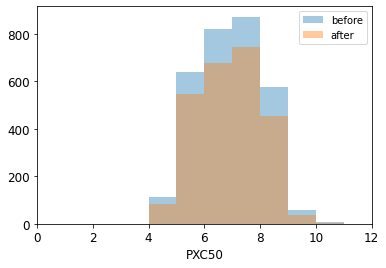

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()


before=dset_df["PXC50"]

# Our after variable is comprised of our curated_df dataframe 
# Our curated_df was configured earlier to discard any out of range values
after=curated_df["PXC50"]

# plots the values of the response value column of both the before and after dataframes from above
# sns.distplot is a Seaborn distplot, which allows you to show a histogram with a line on it
# A distplot plots a univariate distribution of observations 
# Below, we are separating our data set into a before section and an after section 
# To break down the sns.distplot functions: 
# bins=range(0, 12, 1) is used to bin our range of values, meaning to divide the entire range of values into a series of intervals
# ax=ax 
# kde is a kernel density estimate plot that represents the data using a continuous probability density curve
# kde=False will remove the density line on the histogram
# The label= function is used to label different sections of our plot 
sns.distplot(before, bins=range(0, 12, 1), ax=ax, kde=False, label='before')
sns.distplot(after, bins=range(0, 12, 1), ax=ax, kde=False, label='after')

#configures plot by adding a legend and setting the x axis limits for readability
# plt.legend() adds the legend to the plot
plt.legend()

# ax.set_xlim is setting the x-axis limits of the graph, setting it to be from (0,12)
ax.set_xlim([0, 12])